# Bike Sharing Assignment

## 1. Reading, understanding and visualizing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import sklearn 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

bikes = pd.read_csv("day.csv")

Display the 1st 5 rows

In [2]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Find the number of rows and columns in the dataframe

In [3]:
bikes.shape

(730, 16)

Get statistical information about the numeric columns in the dataset

In [4]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Check for missing values

In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Deleting the redundant columns

We decide to deleting the following columns and the justification for doing so is stated as well

- **instant** - This column is metadata and not a feature

- **dteday** - This column is metadata and not a feature

- **holiday** - it is redundant because the same information is avaliable in "workingday"

- **temp** - It has a very high correlation with "atemp"

- **casual** - Casual and registered are added to get the column "cnt"

- **registered** - Casual and registered are added to get the column "cnt"

In [6]:
bikes.drop(columns=["instant", "dteday", "holiday", "temp", "casual", "registered"], inplace=True)

### Visualizing the data

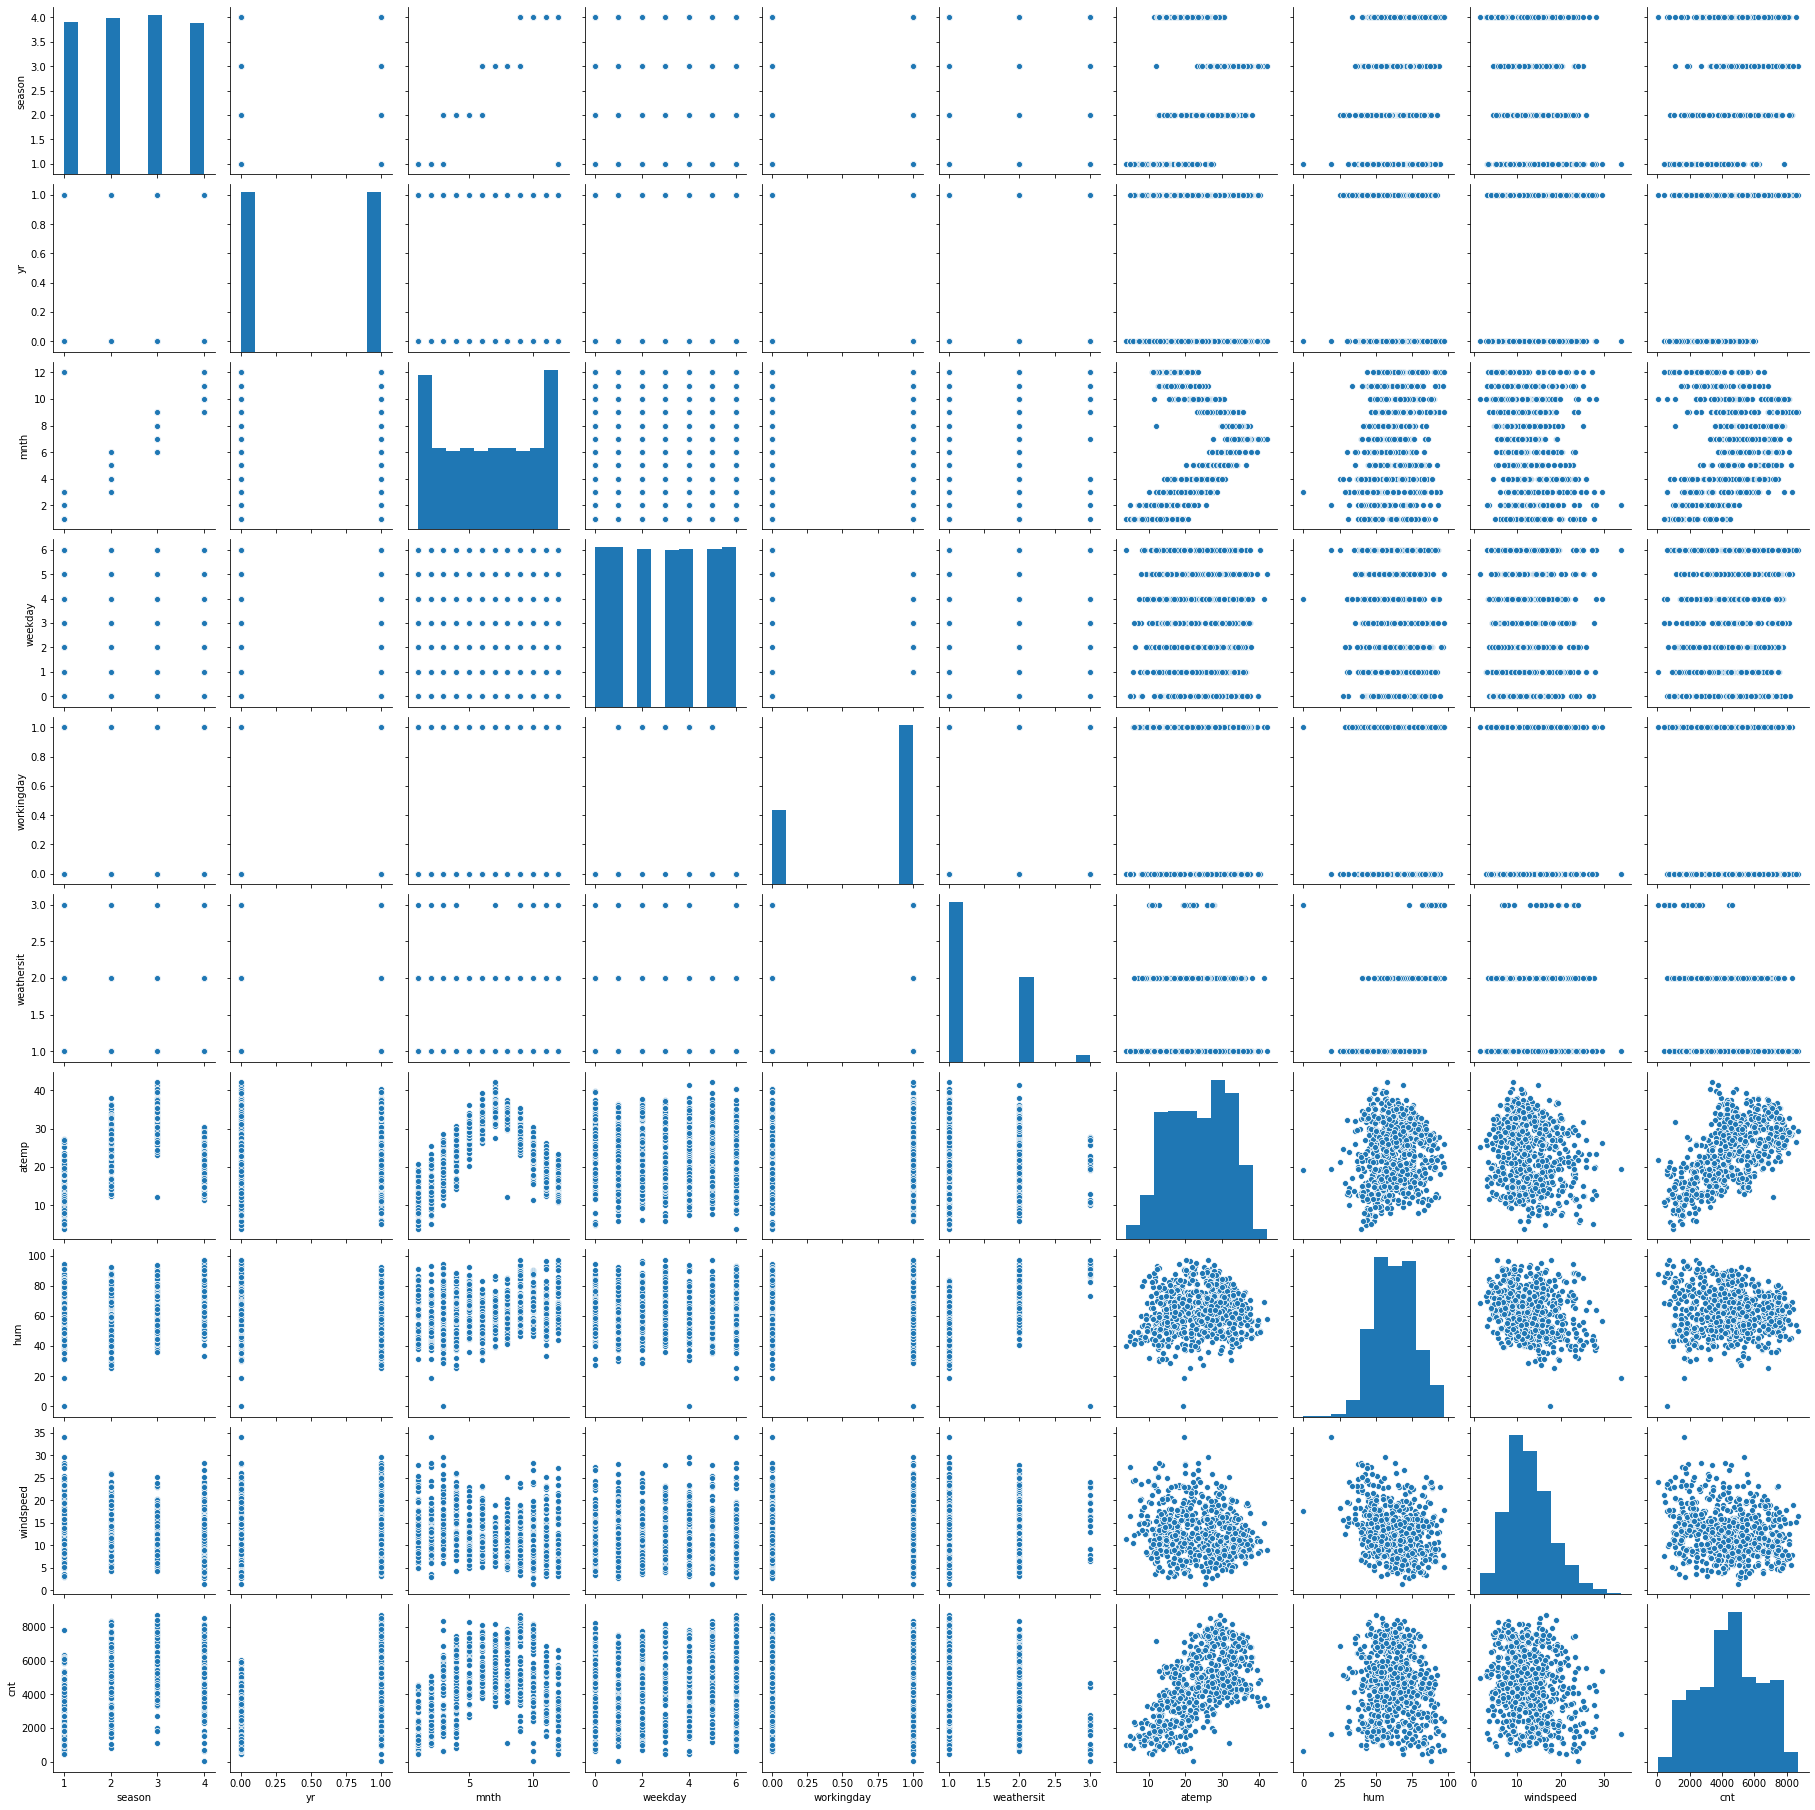

In [7]:
sns.pairplot(bikes)
plt.show()

### Visualizing the categorical data

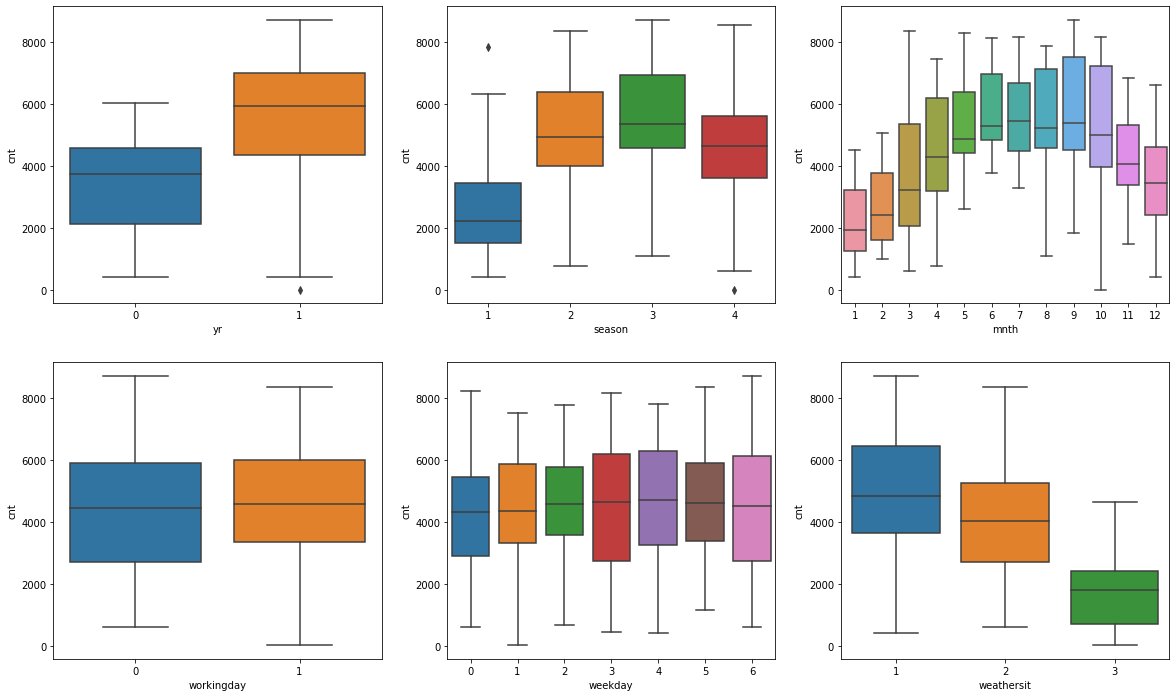

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='yr', y='cnt', data=bikes)
plt.subplot(2,3,2)
sns.boxplot(x='season', y='cnt', data=bikes)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=bikes)
plt.subplot(2,3,4)
sns.boxplot(x='workingday', y='cnt', data=bikes)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=bikes)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='cnt', data=bikes)
plt.show()

## 2. Preparing the data for modeling

### Converting numeric categorical variables to categorical variables

In [9]:
bikes = bikes.replace({"mnth" : {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}})
bikes = bikes.replace({"weekday" : {0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}})
bikes = bikes.replace({"weathersit" : {1:"Clear",2:"Mist",3:"Light Snow/Rain",4:"Heavy Snow/Rain"}})
bikes = bikes.replace({"season" : {1:"Spring",2:"Summer",3:"fall",3:"Winter"}})

### Creating a function to create dummies for a categorical variable column

In [10]:
def create_dummies_for_column(bikes, column_name):
    dummy_frame = pd.get_dummies(bikes[column_name], drop_first=True)
    bikes = pd.concat([bikes, dummy_frame], axis=1)
    bikes = bikes.drop(column_name, axis=1)
    
    return bikes

### Creating dumies for all the categorical variable columns

In [11]:
categorical_variable_columns = ["mnth", "weekday", "weathersit", "season"]

for column_name in categorical_variable_columns:
    bikes = create_dummies_for_column(bikes, column_name)
    
bikes.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Light Snow/Rain', 'Mist', 'Spring', 'Summer', 'Winter'],
      dtype='object')

### Splitting the data in train and test data sets

In [12]:
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


### Scaling the numeric columns in the training dataset

In [13]:
scaler = MinMaxScaler()

numeric_columns = ["atemp", "hum", "windspeed"]

df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

df_train.describe()

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,workingday,atemp,hum,windspeed,cnt,August,December,February,January,...,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.513156,0.650480,0.320883,4485.337255,0.096078,0.084314,0.066667,0.088235,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.262745
std,0.500429,0.468282,0.212410,0.145846,0.169803,1950.666077,0.294988,0.278131,0.249689,0.283915,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.440557
min,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the mix and max values of atemp, hum and windspeed have been scaled to 0.0 and 1.0 respectively

## 3. Training the model

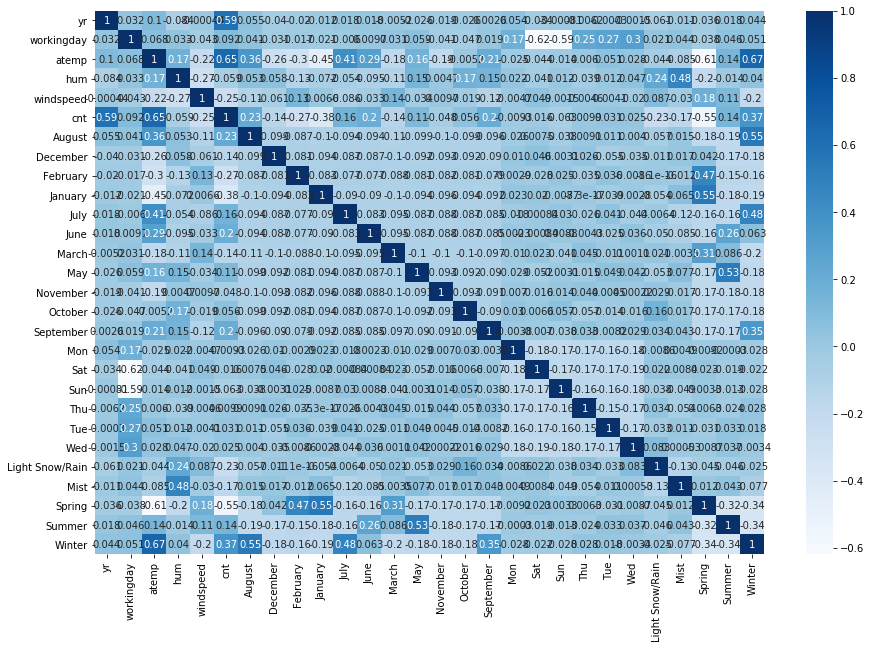

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True, cmap="Blues")
plt.show()

Apart from the diagonal we have no darr blue boxes that indicate a very high correlation

### Dividing into X and Y sets for the model building

In [15]:
y_train = df_train.pop('cnt')
X_train = df_train

X_train.shape

(510, 27)

### Adding all the variables and building a model

Defining a function that performs linear legression using OLS (Ordinary Least Squares) and prints the results

In [16]:
def execute_linear_regression(X_train, y_train):
    X_train_lr = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_lr).fit()
    print(lr.summary())
    
    return (X_train_lr, lr)

Display the summary of our model

In [17]:
execute_linear_regression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          1.07e-179
Time:                        12:45:21   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3342.7470    468.967     

(     const  yr  workingday     atemp       hum  windspeed  August  December  \
 576    1.0   1           1  0.766351  0.725633   0.264686       0         0   
 426    1.0   1           0  0.438975  0.640189   0.255342       0         0   
 728    1.0   1           0  0.200348  0.498067   0.663106       0         1   
 482    1.0   1           0  0.391735  0.504508   0.188475       0         0   
 111    1.0   0           1  0.318819  0.751824   0.380981       0         0   
 ..     ...  ..         ...       ...       ...        ...     ...       ...   
 578    1.0   1           1  0.824359  0.679690   0.187140       1         0   
 53     1.0   0           1  0.218747  0.435939   0.111379       0         0   
 350    1.0   0           0  0.223544  0.577930   0.431816       0         1   
 79     1.0   0           1  0.434043  0.759870   0.529881       0         0   
 520    1.0   1           1  0.586515  0.632030   0.359599       0         0   
 
      February  January  ...  Sat  Sun

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [18]:
def display_vif(X_train):
    # Create a dataframe that will contain all the feature variables and their respective VIF's
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [19]:
display_vif(X_train)

           Features    VIF
3               hum  39.14
2             atemp  35.73
1        workingday  22.18
26           Winter  11.75
25           Summer   9.48
24           Spring   8.95
5            August   6.52
17              Sat   6.50
18              Sun   6.13
9              July   5.68
4         windspeed   5.25
8           January   5.00
14          October   4.87
15        September   4.67
13         November   4.35
6          December   3.92
7          February   3.74
11            March   3.31
10             June   2.84
23             Mist   2.39
12              May   2.36
21              Wed   2.27
16              Mon   2.19
0                yr   2.12
19              Thu   2.07
20              Tue   2.03
22  Light Snow/Rain   1.32


Creating a function to drop and run linear regression

In [20]:
def drop_execute_linear_regression(column_name):
    X_train.drop(columns=column_name, inplace=True)
    (X_train_lr1, lr1) = execute_linear_regression(X_train, y_train)
    display_vif(X_train)
    
    return (X_train_lr1, lr1)

From the data above we can see that **March** has a high p-value, so we drop it and rerun our model

In [21]:
drop_execute_linear_regression("March")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          1.03e-180
Time:                        12:45:21   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     483   BIC:                             8373.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3340.3078    434.456     

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(     const  yr  workingday     atemp       hum  windspeed  August  December  \
 576    1.0   1           1  0.766351  0.725633   0.264686       0         0   
 426    1.0   1           0  0.438975  0.640189   0.255342       0         0   
 728    1.0   1           0  0.200348  0.498067   0.663106       0         1   
 482    1.0   1           0  0.391735  0.504508   0.188475       0         0   
 111    1.0   0           1  0.318819  0.751824   0.380981       0         0   
 ..     ...  ..         ...       ...       ...        ...     ...       ...   
 578    1.0   1           1  0.824359  0.679690   0.187140       1         0   
 53     1.0   0           1  0.218747  0.435939   0.111379       0         0   
 350    1.0   0           0  0.223544  0.577930   0.431816       0         1   
 79     1.0   0           1  0.434043  0.759870   0.529881       0         0   
 520    1.0   1           1  0.586515  0.632030   0.359599       0         0   
 
      February  January  ...  Sat  Sun

**October** has a high p-value so we delete it

In [22]:
drop_execute_linear_regression("October")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.0
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          1.00e-181
Time:                        12:45:21   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     484   BIC:                             8367.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3390.9753    385.866     

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(     const  yr  workingday     atemp       hum  windspeed  August  December  \
 576    1.0   1           1  0.766351  0.725633   0.264686       0         0   
 426    1.0   1           0  0.438975  0.640189   0.255342       0         0   
 728    1.0   1           0  0.200348  0.498067   0.663106       0         1   
 482    1.0   1           0  0.391735  0.504508   0.188475       0         0   
 111    1.0   0           1  0.318819  0.751824   0.380981       0         0   
 ..     ...  ..         ...       ...       ...        ...     ...       ...   
 578    1.0   1           1  0.824359  0.679690   0.187140       1         0   
 53     1.0   0           1  0.218747  0.435939   0.111379       0         0   
 350    1.0   0           0  0.223544  0.577930   0.431816       0         1   
 79     1.0   0           1  0.434043  0.759870   0.529881       0         0   
 520    1.0   1           1  0.586515  0.632030   0.359599       0         0   
 
      February  January  ...  Sat  Sun

**Wed** has a high p-value so we delete it

In [23]:
drop_execute_linear_regression("Wed")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.7
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          1.08e-182
Time:                        12:45:21   Log-Likelihood:                -4102.8
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     485   BIC:                             8361.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3363.9274    382.415     

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(     const  yr  workingday     atemp       hum  windspeed  August  December  \
 576    1.0   1           1  0.766351  0.725633   0.264686       0         0   
 426    1.0   1           0  0.438975  0.640189   0.255342       0         0   
 728    1.0   1           0  0.200348  0.498067   0.663106       0         1   
 482    1.0   1           0  0.391735  0.504508   0.188475       0         0   
 111    1.0   0           1  0.318819  0.751824   0.380981       0         0   
 ..     ...  ..         ...       ...       ...        ...     ...       ...   
 578    1.0   1           1  0.824359  0.679690   0.187140       1         0   
 53     1.0   0           1  0.218747  0.435939   0.111379       0         0   
 350    1.0   0           0  0.223544  0.577930   0.431816       0         1   
 79     1.0   0           1  0.434043  0.759870   0.529881       0         0   
 520    1.0   1           1  0.586515  0.632030   0.359599       0         0   
 
      February  January  ...  Mon  Sat

**July** has a high p-value so we delete it

In [24]:
drop_execute_linear_regression("July")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.8
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          1.14e-183
Time:                        12:45:21   Log-Likelihood:                -4102.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     486   BIC:                             8355.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3389.3116    379.561     

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(     const  yr  workingday     atemp       hum  windspeed  August  December  \
 576    1.0   1           1  0.766351  0.725633   0.264686       0         0   
 426    1.0   1           0  0.438975  0.640189   0.255342       0         0   
 728    1.0   1           0  0.200348  0.498067   0.663106       0         1   
 482    1.0   1           0  0.391735  0.504508   0.188475       0         0   
 111    1.0   0           1  0.318819  0.751824   0.380981       0         0   
 ..     ...  ..         ...       ...       ...        ...     ...       ...   
 578    1.0   1           1  0.824359  0.679690   0.187140       1         0   
 53     1.0   0           1  0.218747  0.435939   0.111379       0         0   
 350    1.0   0           0  0.223544  0.577930   0.431816       0         1   
 79     1.0   0           1  0.434043  0.759870   0.529881       0         0   
 520    1.0   1           1  0.586515  0.632030   0.359599       0         0   
 
      February  January  ...  Mon  Sat

**Thu** has a high p-value so we delete it

In [25]:
drop_execute_linear_regression("Thu")

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.4
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          1.22e-184
Time:                        12:45:21   Log-Likelihood:                -4103.1
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     487   BIC:                             8350.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3363.3917    377.075     

(     const  yr  workingday     atemp       hum  windspeed  August  December  \
 576    1.0   1           1  0.766351  0.725633   0.264686       0         0   
 426    1.0   1           0  0.438975  0.640189   0.255342       0         0   
 728    1.0   1           0  0.200348  0.498067   0.663106       0         1   
 482    1.0   1           0  0.391735  0.504508   0.188475       0         0   
 111    1.0   0           1  0.318819  0.751824   0.380981       0         0   
 ..     ...  ..         ...       ...       ...        ...     ...       ...   
 578    1.0   1           1  0.824359  0.679690   0.187140       1         0   
 53     1.0   0           1  0.218747  0.435939   0.111379       0         0   
 350    1.0   0           0  0.223544  0.577930   0.431816       0         1   
 79     1.0   0           1  0.434043  0.759870   0.529881       0         0   
 520    1.0   1           1  0.586515  0.632030   0.359599       0         0   
 
      February  January  ...  Septembe

**Sun** has a high p-value so we delete it

In [26]:
drop_execute_linear_regression("Sun")

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.4
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          1.60e-185
Time:                        12:45:21   Log-Likelihood:                -4103.6
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     488   BIC:                             8344.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3569.8278    302.309     

(     const  yr  workingday     atemp       hum  windspeed  August  December  \
 576    1.0   1           1  0.766351  0.725633   0.264686       0         0   
 426    1.0   1           0  0.438975  0.640189   0.255342       0         0   
 728    1.0   1           0  0.200348  0.498067   0.663106       0         1   
 482    1.0   1           0  0.391735  0.504508   0.188475       0         0   
 111    1.0   0           1  0.318819  0.751824   0.380981       0         0   
 ..     ...  ..         ...       ...       ...        ...     ...       ...   
 578    1.0   1           1  0.824359  0.679690   0.187140       1         0   
 53     1.0   0           1  0.218747  0.435939   0.111379       0         0   
 350    1.0   0           0  0.223544  0.577930   0.431816       0         1   
 79     1.0   0           1  0.434043  0.759870   0.529881       0         0   
 520    1.0   1           1  0.586515  0.632030   0.359599       0         0   
 
      February  January  ...  November

**atemp** has a high VIF so we delete it

In [27]:
drop_execute_linear_regression("atemp")

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     111.1
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          2.32e-167
Time:                        12:45:21   Log-Likelihood:                -4150.1
No. Observations:                 510   AIC:                             8342.
Df Residuals:                     489   BIC:                             8431.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4886.6547    296.996     

(     const  yr  workingday       hum  windspeed  August  December  February  \
 576    1.0   1           1  0.725633   0.264686       0         0         0   
 426    1.0   1           0  0.640189   0.255342       0         0         0   
 728    1.0   1           0  0.498067   0.663106       0         1         0   
 482    1.0   1           0  0.504508   0.188475       0         0         0   
 111    1.0   0           1  0.751824   0.380981       0         0         0   
 ..     ...  ..         ...       ...        ...     ...       ...       ...   
 578    1.0   1           1  0.679690   0.187140       1         0         0   
 53     1.0   0           1  0.435939   0.111379       0         0         1   
 350    1.0   0           0  0.577930   0.431816       0         1         0   
 79     1.0   0           1  0.759870   0.529881       0         0         0   
 520    1.0   1           1  0.632030   0.359599       0         0         0   
 
      January  June  ...  November  Se

**hum** has a high p-avalue and VIF so we delete it

In [28]:
drop_execute_linear_regression("hum")

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          3.97e-168
Time:                        12:45:21   Log-Likelihood:                -4150.8
No. Observations:                 510   AIC:                             8342.
Df Residuals:                     490   BIC:                             8426.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4607.3264    163.451     

(     const  yr  workingday  windspeed  August  December  February  January  \
 576    1.0   1           1   0.264686       0         0         0        0   
 426    1.0   1           0   0.255342       0         0         0        0   
 728    1.0   1           0   0.663106       0         1         0        0   
 482    1.0   1           0   0.188475       0         0         0        0   
 111    1.0   0           1   0.380981       0         0         0        0   
 ..     ...  ..         ...        ...     ...       ...       ...      ...   
 578    1.0   1           1   0.187140       1         0         0        0   
 53     1.0   0           1   0.111379       0         0         1        0   
 350    1.0   0           0   0.431816       0         1         0        0   
 79     1.0   0           1   0.529881       0         0         0        0   
 520    1.0   1           1   0.359599       0         0         0        0   
 
      June  May  November  September  Mon  Sat  Tu

**Tue** has a high p-value so we delete it

In [29]:
drop_execute_linear_regression("Tue")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     123.3
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          5.33e-169
Time:                        12:45:21   Log-Likelihood:                -4151.2
No. Observations:                 510   AIC:                             8340.
Df Residuals:                     491   BIC:                             8421.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4602.5119    163.339     

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


           Features   VIF
2         windspeed  4.29
15           Spring  4.10
1        workingday  4.07
16           Summer  3.49
17           Winter  3.42
6           January  2.14
0                yr  1.95
3            August  1.95
5          February  1.84
12              Sat  1.70
8               May  1.69
14             Mist  1.57
10        September  1.52
9          November  1.40
7              June  1.39
4          December  1.31
11              Mon  1.23
13  Light Snow/Rain  1.09


(     const  yr  workingday  windspeed  August  December  February  January  \
 576    1.0   1           1   0.264686       0         0         0        0   
 426    1.0   1           0   0.255342       0         0         0        0   
 728    1.0   1           0   0.663106       0         1         0        0   
 482    1.0   1           0   0.188475       0         0         0        0   
 111    1.0   0           1   0.380981       0         0         0        0   
 ..     ...  ..         ...        ...     ...       ...       ...      ...   
 578    1.0   1           1   0.187140       1         0         0        0   
 53     1.0   0           1   0.111379       0         0         1        0   
 350    1.0   0           0   0.431816       0         1         0        0   
 79     1.0   0           1   0.529881       0         0         0        0   
 520    1.0   1           1   0.359599       0         0         0        0   
 
      June  May  November  September  Mon  Sat  Li

**May** has a high p-value so we delete it

In [30]:
drop_execute_linear_regression("May")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     125.2
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          3.10e-166
Time:                        12:45:21   Log-Likelihood:                -4160.4
No. Observations:                 510   AIC:                             8357.
Df Residuals:                     492   BIC:                             8433.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4653.0702    165.702     

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(     const  yr  workingday  windspeed  August  December  February  January  \
 576    1.0   1           1   0.264686       0         0         0        0   
 426    1.0   1           0   0.255342       0         0         0        0   
 728    1.0   1           0   0.663106       0         1         0        0   
 482    1.0   1           0   0.188475       0         0         0        0   
 111    1.0   0           1   0.380981       0         0         0        0   
 ..     ...  ..         ...        ...     ...       ...       ...      ...   
 578    1.0   1           1   0.187140       1         0         0        0   
 53     1.0   0           1   0.111379       0         0         1        0   
 350    1.0   0           0   0.431816       0         1         0        0   
 79     1.0   0           1   0.529881       0         0         0        0   
 520    1.0   1           1   0.359599       0         0         0        0   
 
      June  November  September  Mon  Sat  Light S

**Winter** has a high p-value so we delete it

In [31]:
drop_execute_linear_regression("Winter")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          4.44e-167
Time:                        12:45:21   Log-Likelihood:                -4161.0
No. Observations:                 510   AIC:                             8356.
Df Residuals:                     493   BIC:                             8428.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4572.8616    145.973     

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(     const  yr  workingday  windspeed  August  December  February  January  \
 576    1.0   1           1   0.264686       0         0         0        0   
 426    1.0   1           0   0.255342       0         0         0        0   
 728    1.0   1           0   0.663106       0         1         0        0   
 482    1.0   1           0   0.188475       0         0         0        0   
 111    1.0   0           1   0.380981       0         0         0        0   
 ..     ...  ..         ...        ...     ...       ...       ...      ...   
 578    1.0   1           1   0.187140       1         0         0        0   
 53     1.0   0           1   0.111379       0         0         1        0   
 350    1.0   0           0   0.431816       0         1         0        0   
 79     1.0   0           1   0.529881       0         0         0        0   
 520    1.0   1           1   0.359599       0         0         0        0   
 
      June  November  September  Mon  Sat  Light S

**August** has a high VIF so we delete it

In [32]:
(X_train_lr1, lr1) = drop_execute_linear_regression("August")

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 01 Dec 2020   Prob (F-statistic):          2.36e-167
Time:                        12:45:21   Log-Likelihood:                -4162.9
No. Observations:                 510   AIC:                             8358.
Df Residuals:                     494   BIC:                             8426.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4664.1495    138.549     

We have all p-values<0.05 and VIF<5 for all features, so this is our final model

The important features of our model in descending order are
- yr	**2143.28**
- Sat	**516.95**
- June	**514.16**
- September	**507.86**
- workingday	**495.77**
- Mon	**-219.02**
- Summer           	**-418.25**
- Mist	**-736.34**
- February	**-862.40**
- November	**-953.07**
- December	**-1121.58**
- January	**-1446.92**
- windspeed	**-1637.79**
- Spring	**-1663.28**
- Light Snow/Rain 	**-2735.39**

In [33]:
X_train.shape

(510, 15)

## 4. Residual analysis

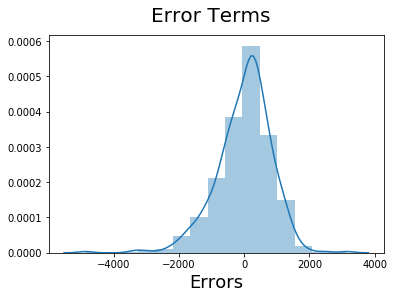

In [34]:
y_train_pred = lr1.predict(X_train_lr1)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

The distribution of error terms look like a normal distribution with a mean of 0

### Plotting residue vs feature

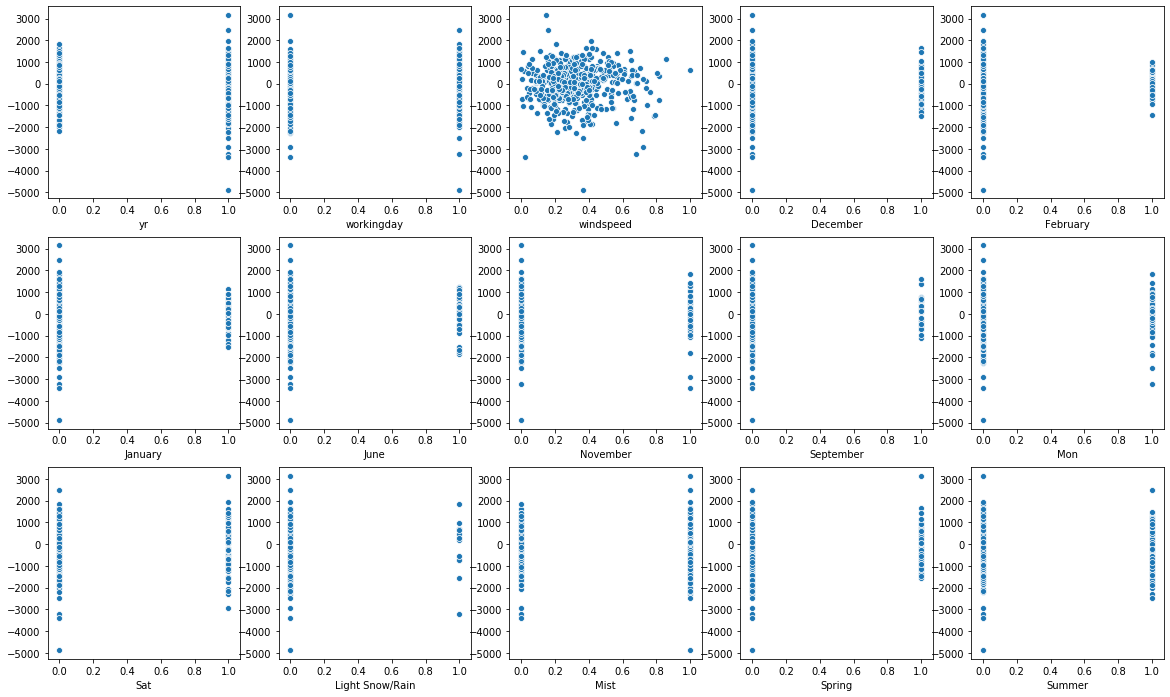

In [35]:
plt.figure(figsize=(20, 12))

for count in range(0,15):
    plt.subplot(3,5,count+1)
    sns.scatterplot(X_train.iloc[:,count], (y_train - y_train_pred))


From the graphs above we can see that the mean of the residue is close to 0 in each case, which indicates that our regression line is a god fit for the training set

## 5. Predictions and evaluation on the test set

Scaling the numeric columns on the test set

In [36]:
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

df_test.describe()

/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/manoharsimons/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,workingday,atemp,hum,windspeed,cnt,August,December,February,January,...,Sat,Sun,Thu,Tue,Wed,Light Snow/Rain,Mist,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.700000,0.532847,0.638221,0.313293,4560.559091,0.059091,0.086364,0.100000,0.077273,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.245455
std,0.500809,0.459303,0.217401,0.148694,0.159584,1904.968544,0.236333,0.281541,0.300684,0.267633,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.431338
min,0.000000,0.000000,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.713308,0.743798,0.402718,5913.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As expected the min and max values of the numeric columns on the test dataset are not 0 and 1 respectively

#### Splitting into X_test and y_test

In [37]:
y_test = df_test.pop("cnt")
X_test = df_test

#### Adding a constant to X_test

In [38]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

#### Dropping the features that were dropped on the training set

In [39]:
# Dropping the features that we have dropped from X_train
X_test.drop(["March", "October", "Wed", "July", "Thu", "Sun", "atemp", "hum", "Tue", "May", "Winter", "August"], axis = 1, inplace=True)


y_test_pred = lr1.predict(X_test)

#### Plotting y_pred vs. y_test

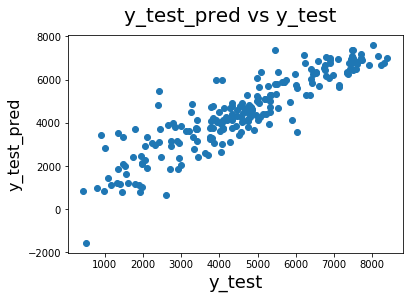

In [40]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test_pred vs y_test', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

There is a high corellation between y_test and y_pred

#### Computing $r^2$ on the training set

In [41]:
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
r2

0.810375094392608

#### Computing $r^2$ on the test set

In [42]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.8027676455651377

$r^2$ on the test set is within 5% of $r^2$ on the test set so our model is good.